In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor
import joblib

In [2]:
df= pd.read_csv("data_set.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

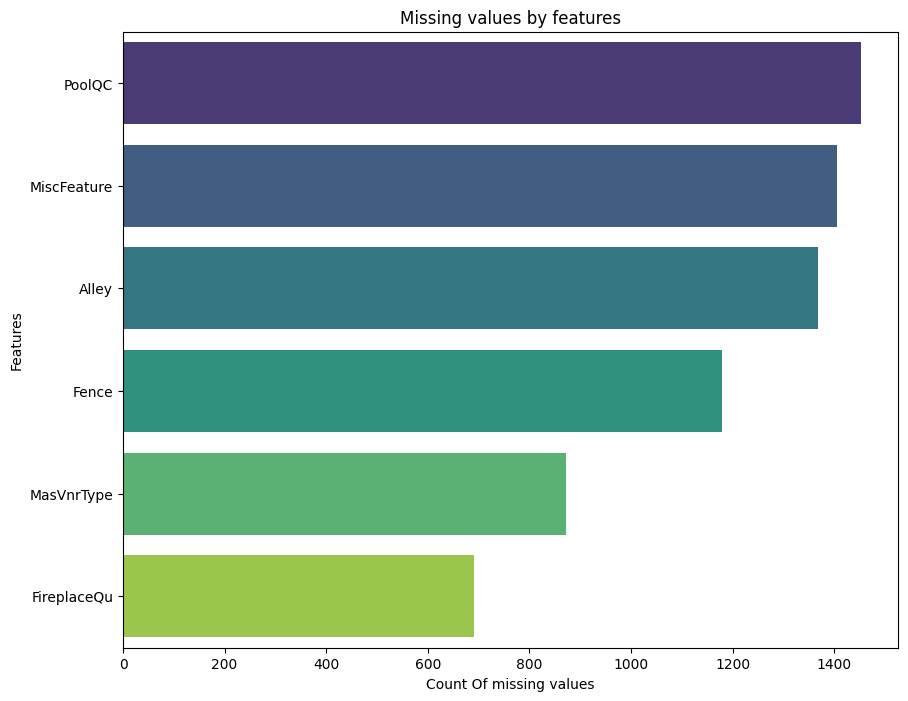

In [4]:
m_values=missing_values[missing_values>500]
plt.figure(figsize=(10,8))
sns.barplot(x=m_values,y=m_values.index,hue=m_values.index,palette='viridis',legend=False)
plt.title("Missing values by features")
plt.xlabel("Count Of missing values")
plt.ylabel("Features")
plt.show()

In [5]:
df=df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [7]:
c_coloumn=df.select_dtypes(include=['object','category']).columns
print("Categorical Coloumns:")
print(c_coloumn)

Categorical Coloumns:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
label_encoder=LabelEncoder()
c_coloumn=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']
for col in c_coloumn:
    df[col]=label_encoder.fit_transform(df[col])
print(df)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         3         65.0     8450       1         3   
1        2          20         3         80.0     9600       1         3   
2        3          60         3         68.0    11250       1         0   
3        4          70         3         60.0     9550       1         0   
4        5          60         3         84.0    14260       1         0   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60         3         62.0     7917       1         3   
1456  1457          20         3         85.0    13175       1         3   
1457  1458          70         3         66.0     9042       1         3   
1458  1459          20         3         68.0     9717       1         3   
1459  1460          20         3         75.0     9937       1         3   

      LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            

In [9]:
corr_matrix=df.corr()
corr_with_price=corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correlated Features:\n",corr_with_price.head(20))

Correlated Features:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


In [10]:
c_features=corr_with_price[corr_with_price>0.25].index
df=df[c_features]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,706,2,65.0,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,978,1,80.0,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,1,486,2,68.0,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1,216,0,60.0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,1,655,2,84.0,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1,0,2,62.0,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,2,790,1,85.0,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,2,275,4,66.0,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,0,49,1,68.0,366,0,0,0,9717,1


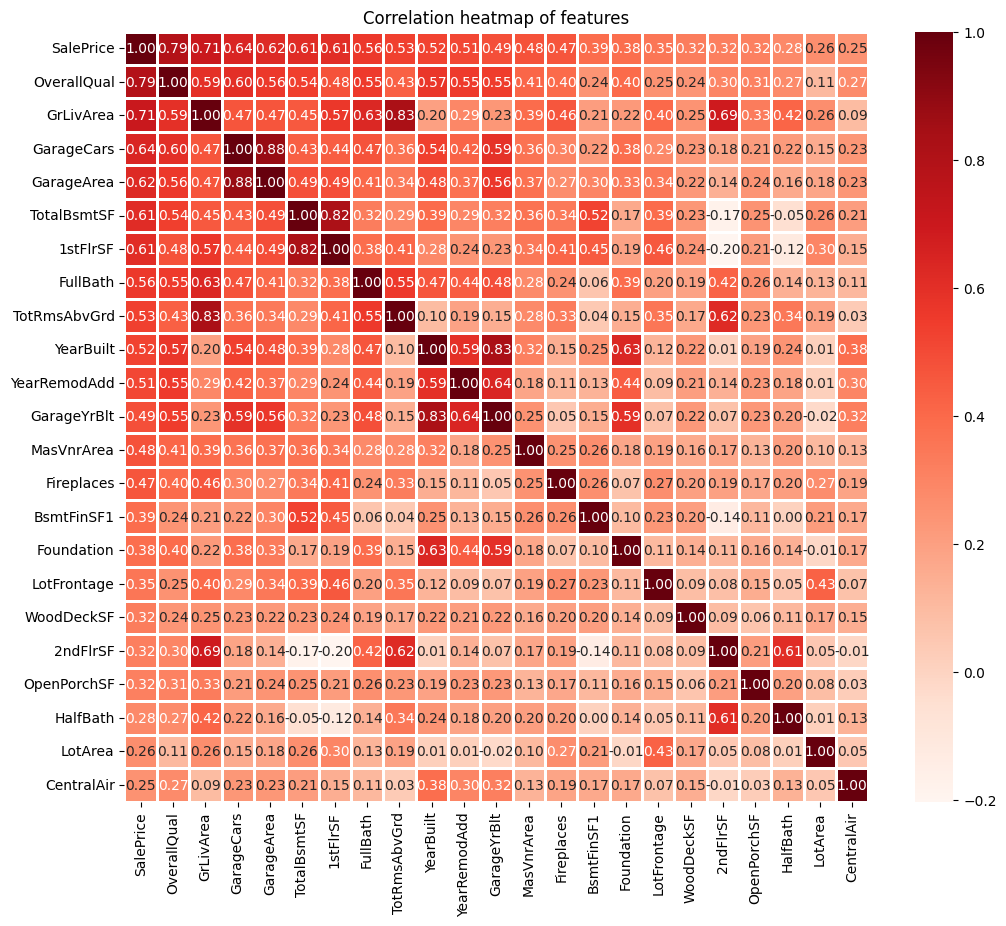

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df[corr_with_price[corr_with_price>0.25].index].corr(),annot=True,fmt='.2f',cmap='Reds',linewidths=1)
plt.title("Correlation heatmap of features")
plt.show()

In [12]:
df=df.drop(columns=['GarageCars','GarageYrBlt','TotRmsAbvGrd','Foundation','2ndFlrSF','HalfBath','TotalBsmtSF'])

In [13]:
df

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
0,208500,7,1710,548,856,2,2003,2003,196.0,0,706,65.0,0,61,8450,1
1,181500,6,1262,460,1262,2,1976,1976,0.0,1,978,80.0,298,0,9600,1
2,223500,7,1786,608,920,2,2001,2002,162.0,1,486,68.0,0,42,11250,1
3,140000,7,1717,642,961,1,1915,1970,0.0,1,216,60.0,0,35,9550,1
4,250000,8,2198,836,1145,2,2000,2000,350.0,1,655,84.0,192,84,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,2,1999,2000,0.0,1,0,62.0,0,40,7917,1
1456,210000,6,2073,500,2073,2,1978,1988,119.0,2,790,85.0,349,0,13175,1
1457,266500,7,2340,252,1188,2,1941,2006,0.0,2,275,66.0,0,60,9042,1
1458,142125,5,1078,240,1078,1,1950,1996,0.0,0,49,68.0,366,0,9717,1


In [14]:
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
195,148500,6,1456,440,855,2,1976,1976,0.0,1,566,24.0,87,0,2280,1
111,180000,7,1430,400,774,2,2000,2000,0.0,1,250,NaN,180,0,7750,1
186,173000,7,1217,497,1217,2,1990,1991,0.0,0,611,NaN,168,27,9947,1
796,143500,6,1285,528,1285,1,1977,1977,148.0,1,0,71.0,138,0,8197,1
1442,310000,10,2007,812,1026,2,2008,2008,160.0,1,765,85.0,168,52,11003,1


In [15]:
df.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageArea        0
1stFlrSF          0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
OpenPorchSF       0
LotArea           0
CentralAir        0
dtype: int64

In [16]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [17]:
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
LotArea         0
CentralAir      0
dtype: int64

In [18]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
0,7,1710,548,856,2,2003,2003,196.0,0,706,65.0,0,61,8450,1
1,6,1262,460,1262,2,1976,1976,0.0,1,978,80.0,298,0,9600,1
2,7,1786,608,920,2,2001,2002,162.0,1,486,68.0,0,42,11250,1
3,7,1717,642,961,1,1915,1970,0.0,1,216,60.0,0,35,9550,1
4,8,2198,836,1145,2,2000,2000,350.0,1,655,84.0,192,84,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,460,953,2,1999,2000,0.0,1,0,62.0,0,40,7917,1
1456,6,2073,500,2073,2,1978,1988,119.0,2,790,85.0,349,0,13175,1
1457,7,2340,252,1188,2,1941,2006,0.0,2,275,66.0,0,60,9042,1
1458,5,1078,240,1078,1,1950,1996,0.0,0,49,68.0,366,0,9717,1


In [20]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [21]:
model=XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    subsample=0.65,
    random_state=42
)

model.fit(x_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [22]:
print("Model Parameters:")
print(f"Learning Rate: {model.get_params()['learning_rate']}")
print(f"Max Depth: {model.get_params()['max_depth']}")
print(f"N Estimators: {model.get_params()['n_estimators']}")
print(f"Subsample: {model.get_params()['subsample']}")

Model Parameters:
Learning Rate: 0.01
Max Depth: 6
N Estimators: 1000
Subsample: 0.65


In [23]:
y_pred=model.predict(x_test)

In [24]:
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mae)

r2score=r2_score(y_test,y_pred)
print("R2 Score:",r2score)


Mean absolute error: 18272.857421875
R2 Score: 0.899516761302948


In [25]:
joblib.dump(model,'xgb_model.jb')      

['xgb_model.jb']